# C0TB1060 蒲原紳乃輔

# 検証

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

class MemorizingClassifier(BaseEstimator, ClassifierMixin):
    "fit に与えられた訓練例 X, yを丸暗記して，それらに対しては正しく答えられる分類器 "
  
    def __init__(self):
        "必要な初期化をここで行う"
        self.X = []
        self.y = []
        
    def fit(self, X, y):
        """(X, y) を丸暗記する"""
        self.X = X
        self.y = y
        return self
    
    def predict(self, X):
        "記憶に基づいて予測を行う．記憶にないものはテキトーに答える．"
        pred_y = np.zeros(len(X), dtype=int)   # このままだとすべて 0 と答える．
        for i, x in enumerate(X):
            for xi, label in zip(self.X, self.y):
                if np.array_equal(xi, x):   # xi == x の判定を配列に対して行う
                    pred_y[i] = label
                    break
            else:  # 22行目の for文が 25行目で break しなかったときのみ，この処理を行う
                pred_y[i] = random.randint(0, 1)    # 記憶にないのでサイコロに任せる．
        return pred_y

In [3]:
class MemorizingClassifier1(MemorizingClassifier):
  def prediict(self,X):
    "記憶に基づいて予測を行う．記憶にないものはテキトーに答える．"
    pred_y = np.zeros(len(X), dtype=int)   # このままだとすべて 0 と答える．
    for i, x in enumerate(X):
        for xi, label in zip(self.X, self.y):
          if np.array_equal(xi, x):   # xi == x の判定を配列に対して行う
            pred_y[i] = label
            break
          else:  # 22行目の for文が 25行目で break しなかったときのみ，この処理を行う
            pred_y[i] = 1    # 記憶にないので1と答える
    return pred_y

上で定義した**丸暗記型分類器** `MemorizingClassifier` は，`fit(X, y)` で与えられた訓練データ `(X, y)` を**丸暗記**することで，全く同じデータに対しては常に正しい予測値を返すことができる．したがって，データに矛盾のない場合には100%の分類精度を達成することができる．

しかしながら，これでよいのだろうか？我々の期待しているのは，**未知のデータに対してもそれなりによい予測を返す分類器**ではないだろうか？

## ホールドアウト検証 (Hold-out varidation)

この目的のために，元のデータ`(X, y)`を事前に**訓練データ** `(train_X, train_y)` と**テストデータ** `(test_X, test_y)` に分けておき，

```
model.fit(train_X, train_y)
```
で訓練したモデルを

```
accuracy = model.score(test_X, test_y)
```
で評価することにしよう．このような検証法を **ホールドアウト検証** (Hold-out varidation)という．



<img src="https://drive.google.com/uc?export=view&id=1k3Ittpd2kG6MVwKOzCub1zJKuMCSuKXG" width = 50%>


それでは，データ `(X, y)` から訓練データ `(train_X, train_y)` とテストデータ `(test_X, test_y)` を簡単に作ってみよう．まずは安直だが，100個のデータのうちの最初の70個を訓練データとし，残りの30個を訓練データにしてみることにする．

In [4]:
iris = load_iris()
X = iris.data[iris.target!=2, 0:2]
y = iris.target[iris.target!=2]

train_X = X[:70]    # 最初の70個
train_y = y[:70]
test_X = X[70:]    # 残りの30個
test_y = y[70:]

In [5]:
model = MemorizingClassifier()
model.fit(train_X, train_y)
accuracy_for_train = model.score(train_X, train_y)
accuracy_for_test  = model.score(test_X,  test_y)
print("accuracy for training data is ", accuracy_for_train)
print("accuracy for test data is     ", accuracy_for_test)

accuracy for training data is  1.0
accuracy for test data is      0.4666666666666667


予想通り，訓練データに対しては 100% の精度が得られたが，残りのテストデータに対しては 50%程度しか当たらないことがわかる．なお，上のセルを何度か実行してみると，テストデータに対する精度が実行のたびに異なることに気づくだろう．これは `model.predict(X)` の中で，記憶にない未知のデータに対してはコイン投げ（乱数）任せになっていることに起因するものである．

## 練習課題

*   上の練習課題で作った丸暗記型学習器 `MemorizingClassifier1` は，未知のデータに対して常に 1 と答えるはずである．これを使うと上記の偏ったテストデータ `(test_X, test_y)` が全問正解になることを確かめよう． 


In [6]:
#上で作った丸暗記型学習器MemorizingClassifier1を使って全部正解になることを確かめる
model1 = MemorizingClassifier1()
model1.fit(train_X,train_y)
accuracy_for_test  = model1.score(test_X, test_y)
print(accuracy_for_test)

0.5


# 課題レポート

## 1.ホールドアウト検証を用いたモデルの評価
今回は構築したモデルの汎用性を確認するためにホールドアウト法を用いたモデルの検証を行った。前回は自分で構築した学習器を用いてデータの分類を行ったが、その際にあるデータをすべて用いて学習を行ったので、未知のデータに対応できるかわからなかった。今回は、未知のデータにも対応できる分類器をつくろうと思う。

### [実装]
まずはデータの生成を行う(今回はbreast_cancerデータを使ってみよう) 特徴量を全部用いて学習を行うので、30個の特徴量を用いている。詳細はdigitsの時のレポートで詳しく取り扱っている \
参考:https://colab.research.google.com/drive/1yFBOq6mGVb_MgtxKEpMmok1A8oU_rw97?usp=sharing


In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

#datasetの生成
breast_cancer = load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target 

ホールドアウト法を用いて学習用と検証用のデータに分割して学習を行う \
scikit-learnのtrain_test_splitを用いる \
参考: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
print('size of X_train',X_train.shape)
print('size of X_test',X_test.shape)
print('size of y_train',y_train.shape)
print('size of y_test',y_test.shape)

size of X_train (398, 30)
size of X_test (171, 30)
size of y_train (398,)
size of y_test (171,)


### 1.分類器について
それでは前回作った分類器にデータを投げてみよう\
自作分類器 (確率勾配降下法を用いた単層パーセプトロン)

In [19]:
from sklearn.base import BaseEstimator, ClassifierMixin

class DIYClassifier08( BaseEstimator, ClassifierMixin ):
    """DIY分類器 ver. 0.8
    DIYClassifier07 と同じものを，BaseEstimator と ClassifierMixin から直接継承して書き直した．
    """
    def __init__(self,lr,input_num,random_state):
      self.random_state = random_state 
      np.random.seed(seed=self.random_state)
      self.W = np.random.randn(input_num,1)
      self.lr = lr 

    def fit(self, X, y):
      output = self.net_output(X)
      #コスト関数を定義する(二乗誤差を用いる)
      self.loss = np.sum(0.5 * (y - output)**2)

      #コスト関数の勾配を求める
      self.grad = -np.dot(X.T,y - output) / X.shape[0] 
      self.grad = self.grad.reshape(X.shape[1],1)

      #コスト関数の勾配を用いてパラメーターの更新を行う
      self.W -= self.lr * self.grad 
    
    def net_output(self,X):
      #傾きや切片を表すパラメータと特徴量データの内積にシグモイド関数を作用させる
      #前回のレポートでsigmoid 関数については触れた(0～1の値を返す関数)
      wx = np.dot(X,self.W) 
      self.output = 1 / (1 + np.exp(-wx))
      self.output = self.output.T
      self.output = self.output.reshape(X.shape[0],)

      return self.output

    def predict(self, X):
      #sigmoid関数で計算した値は0～1の値を取るので、間0.5でクラス0 or クラス1に分類することが可能である
      self.y_pred = np.where(self.net_output(X) >= 0.5,1,0) 
      return self.y_pred 

### 2.学習を行う
irisデータと異なり、特徴量も多いので数十回程度での学習では高い正答率はでないと思われる。そこで、今回は300回のエポックを回して学習を進める \

注意点
前回はデータをすべて学習に用いたが、今回は学習用と検証用に分けたので、それに伴い正答率を格納する配列等も二つ用意する必要がある。

In [20]:
list_acc_train = []
list_loss_train = []
list_acc_test = []

EPOCH = 300

#インスタンスの定義
model = DIYClassifier08(lr=0.01,input_num=30,random_state=32)

#以下、学習用のデータを分類器に作用させる
for epoch in range(EPOCH):
  model.fit(X_train,y_train)
  #予測値を計算
  y_pred_train = model.predict(X_train) #training
  y_pred_test = model.predict(X_test) #test
  #損失関数を配列に代入
  list_loss_train.append(model.loss)

  #正答率を配列に代入する
  score_train = model.score(X_train,y_train)
  list_acc_train.append(score_train)

  score_test = np.sum(y_test==y_pred_test) / y_test.shape[0]
  list_acc_test.append(score_test)

  print(f'EPOCH {epoch + 1}/{EPOCH} ')
  print(f'loss: {np.mean(model.loss)}')
  print(f'acc train: {100.0*score_train}%')
  print(f'acc test: {100.0*score_test}%')
  print(f'score difference {100*(score_train - score_test)}% \n')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


EPOCH 1/300 
loss: 126.99999901637165
acc train: 63.81909547738693%
acc test: 60.23391812865497%
score difference 3.5851773487319605% 

EPOCH 2/300 
loss: 72.0
acc train: 36.18090452261307%
acc test: 39.76608187134503%
score difference -3.5851773487319605% 

EPOCH 3/300 
loss: 127.0
acc train: 63.81909547738693%
acc test: 60.23391812865497%
score difference 3.5851773487319605% 

EPOCH 4/300 
loss: 72.0
acc train: 36.18090452261307%
acc test: 39.76608187134503%
score difference -3.5851773487319605% 

EPOCH 5/300 
loss: 127.0
acc train: 63.81909547738693%
acc test: 60.23391812865497%
score difference 3.5851773487319605% 

EPOCH 6/300 
loss: 72.0
acc train: 36.18090452261307%
acc test: 39.76608187134503%
score difference -3.5851773487319605% 

EPOCH 7/300 
loss: 127.0
acc train: 36.18090452261307%
acc test: 39.76608187134503%
score difference -3.5851773487319605% 

EPOCH 8/300 
loss: 127.0
acc train: 63.81909547738693%
acc test: 60.23391812865497%
score difference 3.5851773487319605% 

EP

出力は各エポックでのトレーイングデータの損失関数の値、トレーニングデータとテストデータの正答率、正答率の差である。エポックを重ねていくにつれて、正答率がどう変化するか調べる

### 3.学習曲線をプロット
最後に学習曲線をプロットすることにする \
方法としては正答率ならびにコスト関数のデータを可視化する

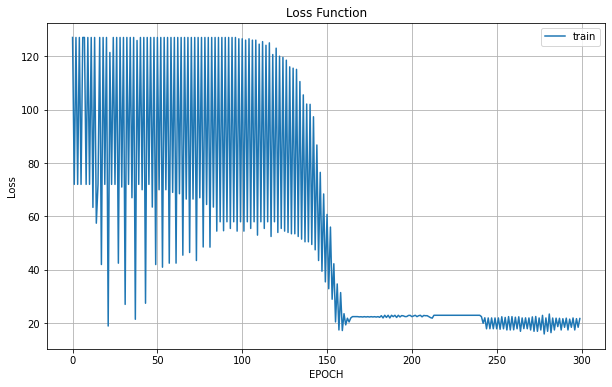

In [21]:
plt.figure(figsize=(10,6))
plt.plot(list_loss_train,label='train')
plt.legend(loc='best')
plt.xlabel('EPOCH')
plt.ylabel('Loss')
plt.title('Loss Function')
plt.grid(True)
plt.show()

学習がちゃんと進んでいる必要条件はコスト関数がしっかりと収束していることである。上ではEPOCHが少ないときは関数が振動している。勾配降下で今回はSGDを採用しているので、少し効率の悪い動き方をしている。深層学習の分野でおそらく取り扱われることになると思うが、AdamやMomentum等を用いると結果が改善すると思われる

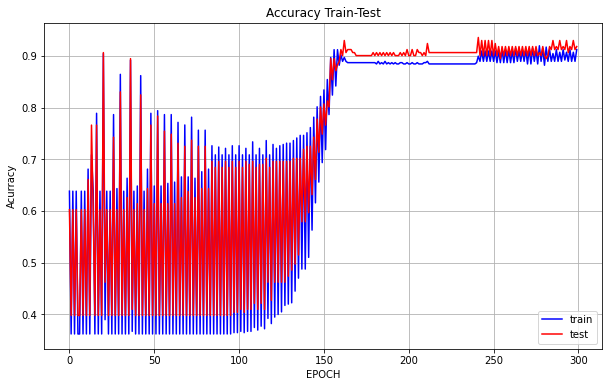

In [22]:
plt.figure(figsize=(10,6))
plt.plot(list_acc_train,color='blue',label='train')
plt.plot(list_acc_test,color='red',label='test')
plt.legend(loc='best')
plt.xlabel('EPOCH')
plt.ylabel('Acurracy')
plt.title('Accuracy Train-Test')
plt.grid(True)
plt.show()

最後にトレーニングデータとテストデータの正答率の最大値を求める

In [23]:
print('Max score of Training data '+ str(np.max(list_acc_train)*100) + '%')
print('Max score of Test data '+ str(np.max(list_acc_test)*100) + '%')
print('Min score difference ' + str(abs(np.max(list_acc_train) - np.max(list_acc_test))*100) + '%')

Max score of Training data 91.95979899497488%
Max score of Test data 93.56725146198829%
Min score difference 1.607452467013426%


## 2.過去レポートの解きなおし
前回取り組んだ課題で解決していなかった問題があったので、この場で再度取り組んでみる。irisデータを用いた場合、特徴量が４つあるが、すべてをプロットして境界面を可視化できるわけではない。前回は６つの組み合わせをすべてプロットしようと取り組んだが、うまくいかなかった。今回TAさんのヘルプを借りながら再度挑戦した。

### 実装

In [24]:
# datasetの読み込み
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[iris.target!=2]
y = iris.target[iris.target!=2]

In [25]:
#境界面のプロット
def plot_decision_regions(x, y, classifier, title,resolution=0.01):
    
  import matplotlib.pyplot as plt 
  import numpy as np 

  # マーカーと色の準備
  markers = ('s', 'x', 'o')
  colors = ('red', 'blue' ,'green')

  # L最大値と最小値を求める
  x_min, x_max = x[:, 0].min() -0.1, x[:, 0].max() +0.1
  # 最大値と最小値を求める
  y_min, y_max = x[:, 1].min() -0.1, x[:, 1].max() +0.1
  # 格子点の座標をresolution(0.01)ごとに取得
  xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), np.arange(y_min, y_max, resolution))
  # 分類器を使って、zにデータを格納
  z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
  z = z.reshape(xx.shape)

  # 格子点とデータをもとに線をプロット
  plt.contourf(xx, yy, z, alpha=0.1,levels=3,colors=["darkorange","darkblue"])
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

  markers = ('s', 'x')
  colors = ('red', 'blue')
  labels = ['setosa','virsicolor','virginica']

  for i, cl in enumerate(np.unique(y)):
    plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1], alpha=0.8, c=colors[i], marker=markers[i], label=labels[cl],edgecolor="k")

  plt.legend(loc='best')
  plt.title(title)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.show()

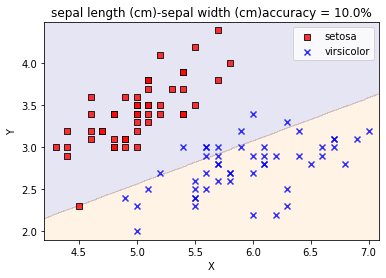

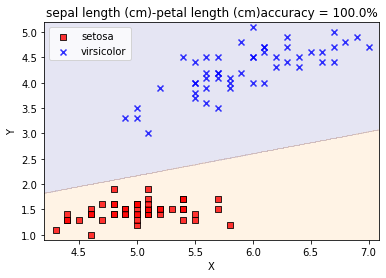

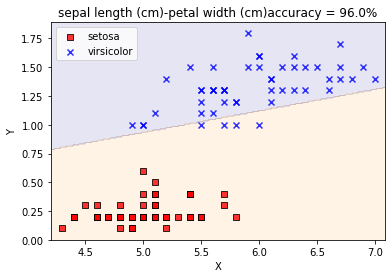

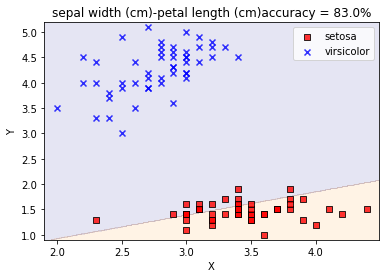

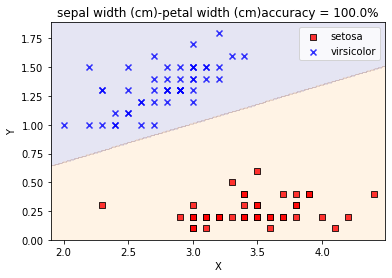

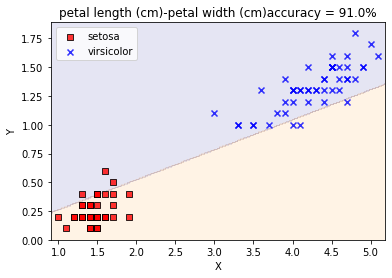

In [26]:
feature_name = iris.feature_names
target_name = iris.target_names

X1 = X[:,[0,1]]
ttl1 = str(feature_name[0]) + '-' + str(feature_name[1])

X2 = X[:,[0,2]]
ttl2 = str(feature_name[0]) + '-' + str(feature_name[2])

X3 = X[:,[0,3]]
ttl3 = str(feature_name[0]) + '-' + str(feature_name[3])

X4 = X[:,[1,2]]
ttl4 = str(feature_name[1]) + '-' + str(feature_name[2])

X5 = X[:,[1,3]]
ttl5 = str(feature_name[1]) + '-' + str(feature_name[3])

X6 = X[:,[2,3]]
ttl6 = str(feature_name[2]) + '-' + str(feature_name[3])

data = [X1,X2,X3,X4,X5,X6]
ttl = [ttl1,ttl2,ttl3,ttl4,ttl5,ttl6]

for i in range(6):
  model = DIYClassifier08(lr=0.1,input_num=2,random_state=32)
  model.fit(data[i],y)
  score = model.score(data[i],y)
  plot_decision_regions(data[i],y,classifier=model,title=str(ttl[i])+'accuracy = '+ str(score*100)+'%')
plt.show()

### 考察
前回irisのデータセットを用いた際、４つの特徴量を用いて正答率100%近くが出た。二次元データを用いて可視化した際に一気に正答率が落ちることがわかった。ただ、データの中でもsepal width - petal widthを用いて分類を行わせたときのみ100%を維持することができた。つまり、全体的には正答率は落ちるが、局所的にみると特徴量を４つも使わずとも正答率を維持することを示す結果が得られる。今回は可視化してこれらのことを主張できるが、どう頑張っても2次元以下では正しく分類できないことがある。そのような事態に出くわした際は可視化以外の方法をとる必要がある。今回は取り扱わないが、データの寄与率の高いデータを抽出して次元削減を行う方法がある。

## 工夫点

今回は分類の結果を単に正答率という数字だけではなく、グラフ等で可視化することに力をいれた。モデルの汎化性能を測るためにはデータをすべて用いるのではなく、学習用データと検証用データに分割した。その際に、train_dataとtest_dataの両方の正答率を計算し、学習回数を重ねていくにつれてそれらがどう変化するか確かめた。はじめ、自分で作成したコードでうまくいかなかったりしたが、TAさんに質問したり自分で調べることで解決した。今回はSGDをパラメータの更新のために用いたため、正答率や損失関数の値が振動しながら収束していった。これは他の勾配降下を用いることで解決しそうである。その他、前回の課題でうまくいかなかった問題を再度考えて修正を加えた。そしたらうまくいったのでうれしかった。このようにエラーの原因がどうしてもわからない際に一人で勉強していると確実に挫折してしまいそうだが、このクラスでは質問に丁寧に答えてくれる人がたくさんいらっしゃるのでとても助かっている。